In [159]:
import matplotlib.pyplot as plt
import imageio
import math
import os
import numpy as np
from skimage import io, color
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure
from scipy.linalg import dft
from scipy.linalg import circulant
from numpy.linalg import matrix_rank
import numpy.linalg as linalg

In [160]:
N=64
c=0.6
def CreatingPhiFunc(N,c):
  M=np.random.normal(scale=np.sqrt(c))
  L=np.random.normal(scale=np.sqrt(N/2*(1-c)))
  K=np.random.randint(low=1,high=N//2+1)
  phi=np.ones((N))*M
  phi[K-1]+=L
  phi[K+N//2-1]+=L
  return phi

def creatingSamples(size,N,c):
  phi_list = []
  for i in range(size):
    phi_list += [CreatingPhiFunc(N,c)]
  samples=np.array(phi_list)
  return samples

In [161]:
#1.a generating samples
autocorr=[]
samples=[]

def showMean(size, mean):
  plt.plot(mean)
  plt.title("mean signal for size: "+str(size))
  _=plt.show()

def showCorrelation(size, autocorr):
  _ = plt.imshow(autocorr)
  _ = plt.title("autocorrelation matrix for size: "+str(size))

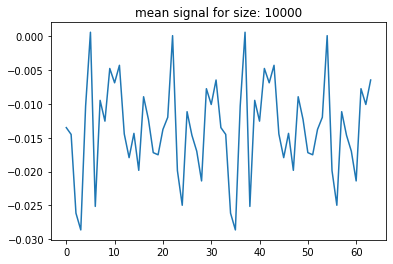

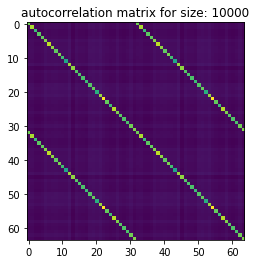

In [162]:
size=10000
samples=creatingSamples(size,N,c)
autocorr=samples.T@samples/size
mean=np.mean(samples,axis=0)
plt.plot(mean)
plt.title("mean signal for size: "+str(size))
plt.show()
_ = plt.imshow(autocorr)
_ = plt.title("autocorrelation matrix for size: "+str(size))

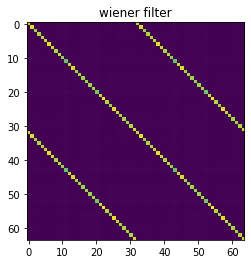

In [163]:
#1.b constructing the wiener filter and generating noisy samples
wiener=autocorr@np.linalg.inv(autocorr+np.eye(N))
plt.imshow(wiener)
_ = plt.title("wiener filter")

In [164]:
noise_mat=np.random.normal(size=samples.shape)
noisy_data=samples+noise_mat
reconstructed_data=(wiener@noisy_data.T).T

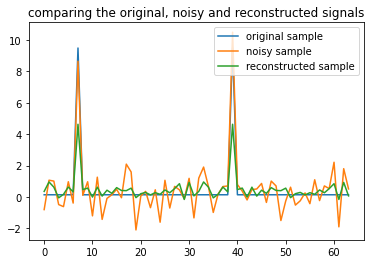

the mse for sample: 71 is: 0.8590979300596034


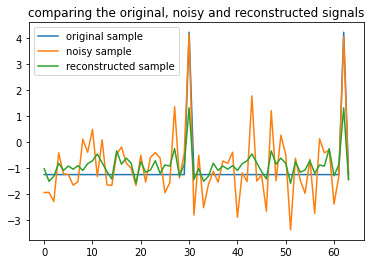

the mse for sample: 308 is: 0.4410823491940258


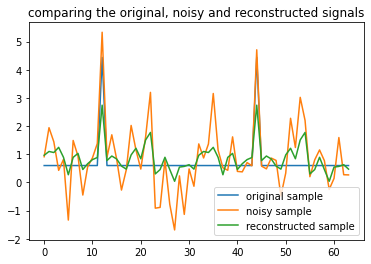

the mse for sample: 4007 is: 0.2516703601974664


In [165]:
def SignalComparison(filtered_noisy_data,reconstructed_data):
  choice_samples=[71,308,4007]
  for i in choice_samples:
    original_sample=samples[i,:]
    noisy_sample=filtered_noisy_data[i,:]
    reconstructed_sample=reconstructed_data[i,:]
    orig_plot, = plt.plot(original_sample,label="original sample")
    noisy_plot, = plt.plot(noisy_sample,label="noisy sample")
    reconstructed_plot, = plt.plot(reconstructed_sample,label="reconstructed sample")
    plt.legend(handles = [orig_plot,noisy_plot,reconstructed_plot])
    plt.title("comparing the original, noisy and reconstructed signals")
    _ = plt.show()
    mse=np.mean((reconstructed_sample-original_sample)**2)
    print("the mse for sample: "+str(i)+" is: "+str(mse))

SignalComparison(noisy_data, reconstructed_data)

In [166]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.2276325533775659


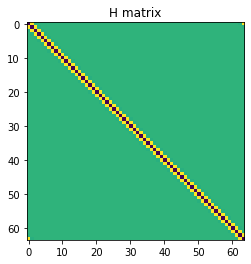

In [167]:
#1.c repeating 1.b only this time multiplying the random original signals by H
circulant_col = np.zeros(N)
circulant_col[0] = -5/2
circulant_col[1] = 4/3
circulant_col[2] = -1/12
circulant_col[-1] = 4/3
circulant_col[-2] = -1/12

h_mat = circulant(circulant_col)
plt.imshow(h_mat)
_ = plt.title("H matrix")

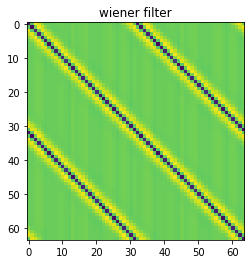

In [168]:
wiener=(autocorr@h_mat.T)@np.linalg.inv((h_mat@autocorr@h_mat.T)+np.eye(N))
plt.imshow(wiener)
_ = plt.title("wiener filter")

In [169]:
noise_mat=np.random.normal(size=samples.shape)
filtered_noisy_data=samples@h_mat.T+noise_mat
reconstructed_data=(wiener@filtered_noisy_data.T).T

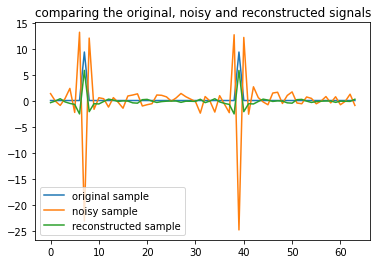

the mse for sample: 71 is: 0.8415758869289709


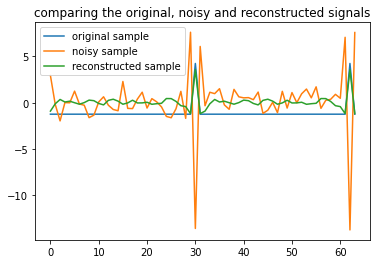

the mse for sample: 308 is: 1.5101099718839064


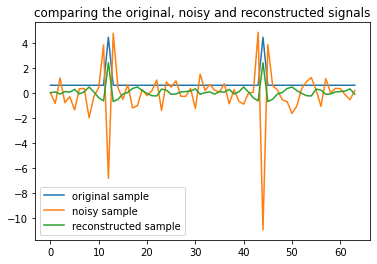

the mse for sample: 4007 is: 0.5637147300432424


In [170]:
SignalComparison(filtered_noisy_data,reconstructed_data)

In [171]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.748691280287281


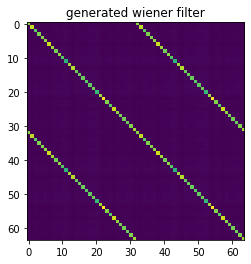

In [172]:
#1.d constructing the wiener filter and generating noisy samples with the new sigma 
wiener=autocorr@np.linalg.inv(autocorr+5*np.eye(N))
plt.imshow(wiener)
_ = plt.title("generated wiener filter")

In [173]:
noise_mat=np.random.normal(size=samples.shape, scale=np.sqrt(5))
noisy_data=samples+noise_mat
reconstructed_data=(wiener@noisy_data.T).T

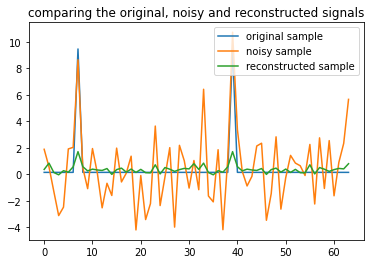

the mse for sample: 71 is: 1.9660709503627176


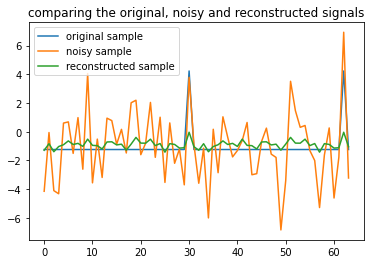

the mse for sample: 308 is: 0.7247517620434961


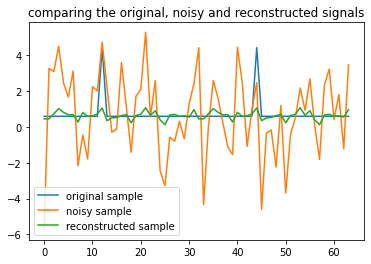

the mse for sample: 4007 is: 0.4004759142843883


In [174]:
SignalComparison(noisy_data, reconstructed_data)

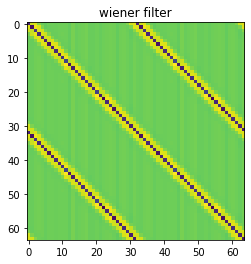

In [175]:
#repeating only this time multiplying the random original signals by H (= h_mat)
circulant_col = np.zeros(N)
circulant_col[0] = -5/2
circulant_col[1] = 4/3
circulant_col[2] = -1/12
circulant_col[-1] = 4/3
circulant_col[-2] = -1/12

h_mat = circulant(circulant_col)
wiener=(autocorr@h_mat.T)@np.linalg.inv((h_mat@autocorr@h_mat.T)+5*np.eye(N))
plt.imshow(wiener)
_ = plt.title("wiener filter")

In [176]:
noise_mat=np.random.normal(size=samples.shape)
filtered_noisy_data=samples@h_mat.T+noise_mat
reconstructed_data=(wiener@filtered_noisy_data.T).T

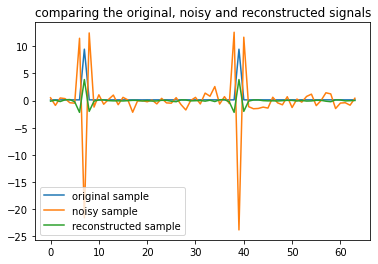

the mse for sample: 71 is: 1.3133678811975982


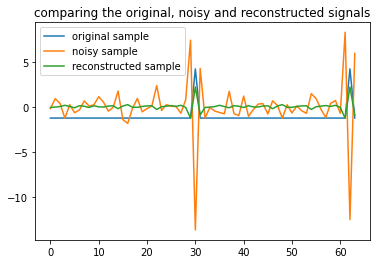

the mse for sample: 308 is: 1.6233980328739595


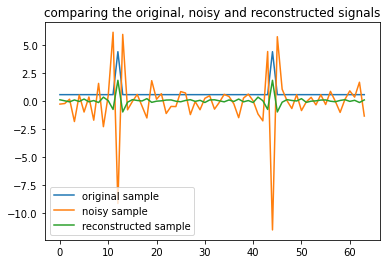

the mse for sample: 4007 is: 0.6055246815757985


In [177]:
SignalComparison(filtered_noisy_data,reconstructed_data)

In [178]:
MSE=np.mean((reconstructed_data-samples)**2)
print("the average mse for all samples in our data is: "+str(MSE))

the average mse for all samples in our data is: 0.7811292121397191


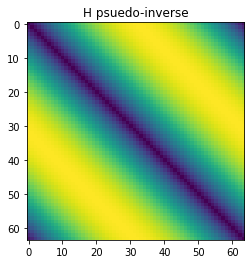

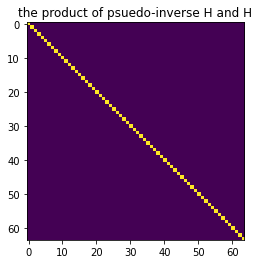

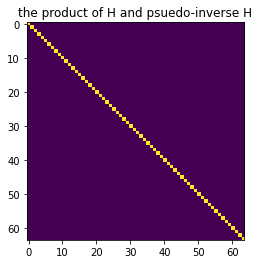

In [179]:
# 1.e - psuedo-inverse calculation of H
h_mat_pinv = linalg.pinv(h_mat)

plt.imshow(h_mat_pinv)
plt.title("H psuedo-inverse")
plt.show()

plt.imshow(h_mat_pinv@h_mat)
plt.title("the product of psuedo-inverse H and H")
plt.show()

plt.imshow(h_mat@h_mat_pinv)
plt.title("the product of H and psuedo-inverse H")
plt.show()

phi1 = np.ones(N)*32
phi2 = np.zeros(N)

hpinv_phi1 = h_mat_pinv@phi1
hpinv_phi2 = h_mat_pinv@phi2

In [180]:
# calculating the 2-norm of the diff of phis and hpinv*phi
norm_phi_diff = np.sqrt((phi1-phi2)@(phi1-phi2))
print(norm_phi_diff)

norm_hphi_diff = np.sqrt((hpinv_phi1-hpinv_phi2)@(hpinv_phi1-hpinv_phi2))
print(norm_hphi_diff)

256.0
3.5483450997089513e-09


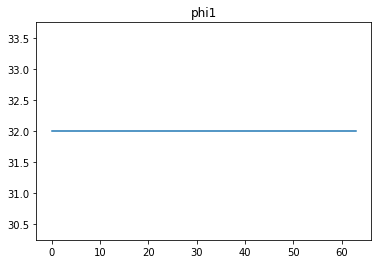

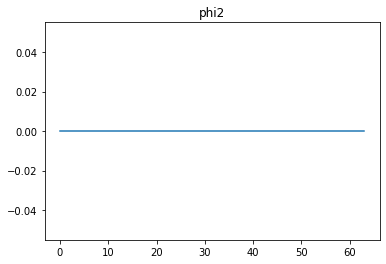

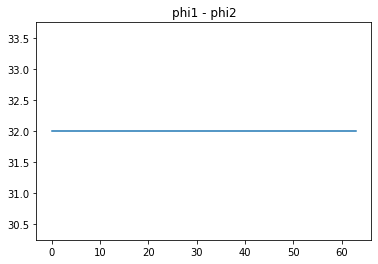

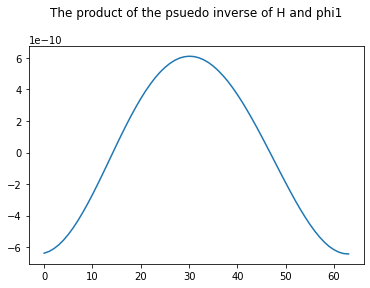

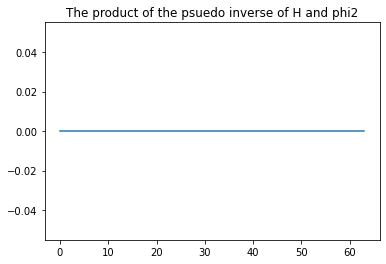

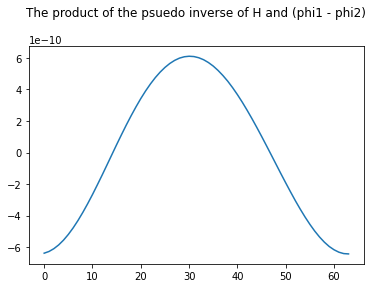

In [181]:
# plotting phi1, phi2, phi1-phi2, hpinv_phi1-hpinv_phi2, hpinv_phi2, hpinv_phi1
plt.plot(phi1) 
plt.title("phi1")
plt.show()

plt.plot(phi2) 
plt.title("phi2")
plt.show()

plt.plot(phi1 - phi2) 
plt.title("phi1 - phi2")
plt.show()

plt.plot(hpinv_phi1) 
plt.title("The product of the psuedo inverse of H and phi1",pad =30)
plt.show()

plt.plot(hpinv_phi2) 
plt.title("The product of the psuedo inverse of H and phi2")
plt.show()

plt.plot(hpinv_phi1 - hpinv_phi2) 
plt.title("The product of the psuedo inverse of H and (phi1 - phi2)", pad =30)
plt.show()